In [1]:
using Distributions
using LinearAlgebra
using Plots
using ScikitLearn
using StatsBase

@sk_import datasets:(make_circles, make_moons, make_blobs)

PyObject <function make_blobs at 0x1a337ec9d8>

In [63]:
include("kmean.jl")
include("gibbs.jl")

update! (generic function with 2 methods)

In [3]:
n_samples = 1500
noisy_circles = make_circles(n_samples = n_samples, factor = .5, noise = .05)
noisy_moons = make_moons(n_samples = n_samples, noise = .05)
blobs = make_blobs(n_samples = n_samples, random_state = 8)

([5.867498067335642 8.177151880030342; 5.613699815229969 9.932955265811792; … ; -4.617010942128589 -9.648559833197563; -3.4864017487955214 -9.257669217594684], [0, 0, 0, 1, 1, 1, 0, 1, 2, 1  …  2, 2, 0, 1, 1, 0, 2, 0, 2, 2])

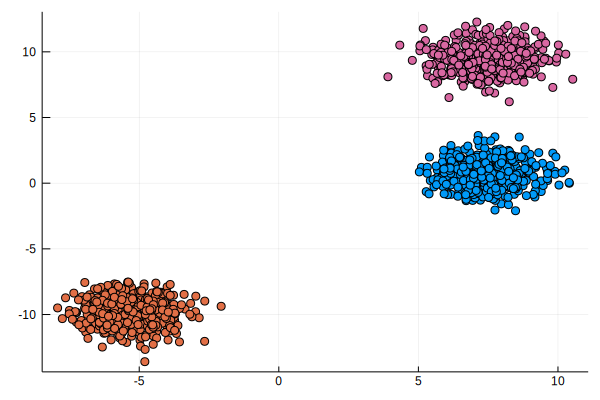

In [4]:
points, labels = blobs
scatter(points[:, 1], points[:, 2], c=labels, label="")

## KMean

In [14]:
km = KMean(points, 3)

KMean([5.867498067335642 8.177151880030342; 5.613699815229969 9.932955265811792; … ; -4.617010942128589 -9.648559833197563; -3.4864017487955214 -9.257669217594684], 3, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0.0 0.0; 0.0 0.0; 0.0 0.0], Inf, Inf)

3484.8906182086516

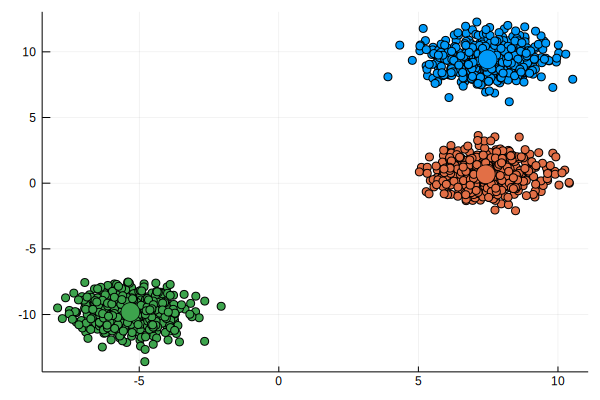

In [19]:
update!(km)
print(km.dist)
scatter(km.points[:, 1], km.points[:, 2], c=km.zs, label="")
scatter!(km.μs[:, 1], km.μs[:, 2], c=[1,2,3], ms=10, label="")

In [7]:
function count_loop_kmean(points, K, n)
    tld = 1.0
    n_loop = Vector{Int64}(undef, n)
    dist_loop = Vector{Float64}(undef, n)
    for k in 1:n
        km = KMean(points, K)
        for i in 1:100
            if abs(km.dist_change) < tld
                n_loop[k] = i
                dist_loop[k] = km.dist
                break
            end
            update!(km)
        end
    end
    return n_loop, dist_loop
end

count_loop_kmean (generic function with 1 method)

In [8]:
n_loop, dist_loop = count_loop_kmean(points, 3, 1000)

([7, 7, 7, 10, 8, 5, 6, 7, 6, 7  …  10, 6, 7, 6, 7, 15, 12, 6, 7, 11], [2959.786729041355, 2959.786729041355, 2959.786729041355, 21792.573382058632, 2959.786729041355, 2959.786729041355, 2959.786729041355, 2959.786729041355, 2959.786729041355, 2959.786729041355  …  21793.571895764555, 21815.554148403386, 2959.786729041355, 2959.786729041355, 2959.786729041355, 21792.491578441783, 21814.403044937164, 2959.786729041355, 2959.786729041355, 21792.491578441783])

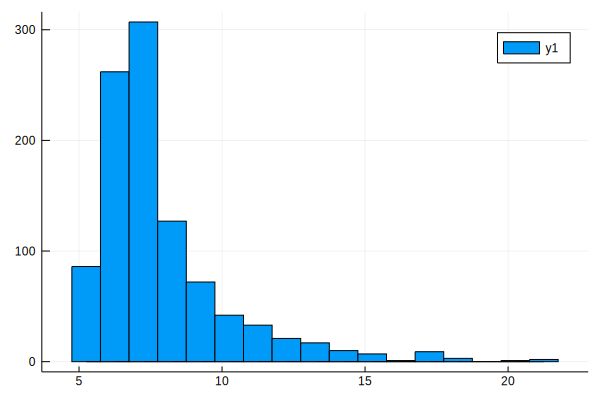

In [9]:
histogram(n_loop, bar_width=1.0)

In [10]:
histogram(dist_loop)

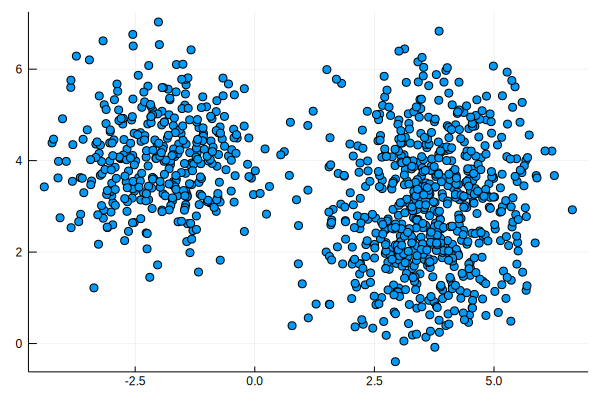

In [11]:
n, K = 1000, 3
zs = rand(Categorical(fill(1/K, K)), n)
μs = rand(MvNormal([0, 0], 5 * I), K)'
norm_μs = mapslices(x -> MvNormal(x, I), μs, dims=2)
xs = hcat([rand(norm_μs[z]) for z in zs]...)

scatter(xs[1, :], xs[2, :], label="")

In [12]:
x, y = size([0.0 3.0; 1.0 4.5; 4.3 2.0])

(3, 2)

In [13]:
zeros(3)

3-element Array{Float64,1}:
 0.0
 0.0
 0.0

In [64]:
gibbs = GibbsFixedVar(points, 3)

GibbsFixedVar([5.867498067335642 8.177151880030342; 5.613699815229969 9.932955265811792; … ; -4.617010942128589 -9.648559833197563; -3.4864017487955214 -9.257669217594684], 3, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0.0 0.0; 0.0 0.0; 0.0 0.0], Inf, Inf)

[-5.308738937223822 -9.792456138327719; 7.465768148048368 9.411232005204276; 7.398724462138653 0.6806010212291329]


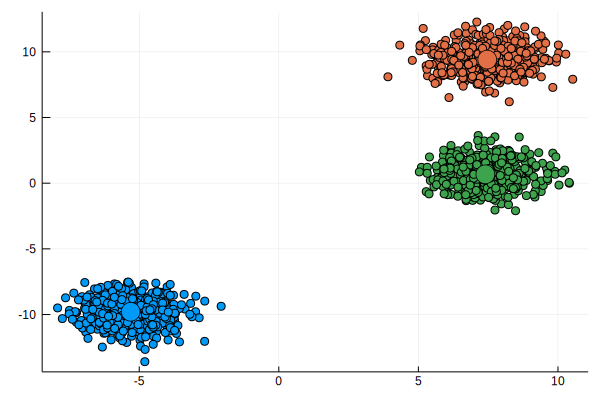

In [78]:
println(gibbs.μs)
update!(gibbs)
scatter(gibbs.points[:, 1], gibbs.points[:, 2], c=gibbs.zs, label="")
scatter!(gibbs.μs[:, 1], gibbs.μs[:, 2], c=[1,2,3], ms=10, label="")